#### Agenda

Pandas - some additional features <br>
Very basic visualization (seaborn) and statistical (statsmodels from scipy) packages <br>
Wrap up Data Analysis Track<br>

Data Science includes multiple stages in working with data.  It assumes that you have some data that you have already acquired, cleaned and prepared for analysis. It also involves data analysis/manipulation that overlaps somewhat (especially data manipulation) with data preparation stage but is also important. <br><br>
pandas is really good for data manipulation. Once the data is prepared and manipulated, then you can perform the actual statistical analysis which is the more glamorous part of the data science. <hr>

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

# import seaborn
# import statsmodels.api as sm

In [2]:
data=pandas.read_csv('bostonh.csv', low_memory=False)

# data is a dataframe from pandas

print(len(data))
print(len(data.columns))

506
14


In [3]:
print(data.columns)

#Variables are explained here - https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PT', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [5]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [5]:
# Select specific columns from the bigger data set
dfb=pandas.DataFrame(data, columns=['AGE', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'CRIM', 'RAD', 'MEDV'])

In [6]:
dfb.head()

,AGE,ZN,INDUS,CHAS,NOX,RM,CRIM,RAD,MEDV
0,65.199997,18.0,2.31,0,0.538,6.575,0.00632,1,24.000000
1,78.900002,0.0,7.07,0,0.469,6.421,0.02731,2,21.600000
2,61.099998,0.0,7.07,0,0.469,7.185,0.02729,2,34.700001
3,45.799999,0.0,2.18,0,0.458,6.998,0.03237,3,33.400002
4,54.200001,0.0,2.18,0,0.458,7.147,0.06905,3,36.200001


In [7]:
rad_count = dfb['RAD'].value_counts() #sort=False
print(rad_count)

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64


In [8]:
# convert string to numeric
rad_count = dfb['RAD'].value_counts(sort=False)
print(rad_count)

1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: RAD, dtype: int64


In [18]:
dfb['RAD']=pandas.to_numeric(dfb['RAD'])
rad_count = dfb['RAD'].value_counts(sort=False)
print(rad_count)
print(type(rad_count))

1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: RAD, dtype: int64
<class 'pandas.core.series.Series'>


In [9]:
# count for CHAS
chas_count = dfb['CHAS'].value_counts(sort=False)
print('Frequency Distribution:', chas_count, sep='\n')

Frequency Distribution:
0    471
1     35
Name: CHAS, dtype: int64


In [11]:
# Key Error
chas_count = dfb['Chas'].value_counts(sort=False)

In [12]:
#  count for CHAS using groupby function
x=data.groupby('CHAS').size()
#x=data.groupby('CHAS').size()*100/len(data)
print(x)

CHAS
0    471
1     35
dtype: int64


In [13]:
import seaborn

# make sure that this package is installed
# close jupyter notebook including the terminal running in a background window
# open terminal program on mac (or equivalent in Windows)
# type the following command "conda install seaborn"
# follow the prompts
# this should work for most packages
# more on seaborn at: https://stanford.edu/~mwaskom/software/seaborn/

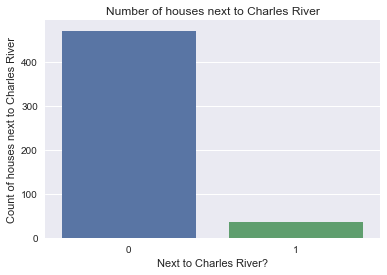

In [14]:
%matplotlib inline
seaborn.countplot(x='CHAS', data=dfb)
plt.xlabel("Next to Charles River?")
plt.ylabel("Count of houses next to Charles River")
plt.title("Number of houses next to Charles River")

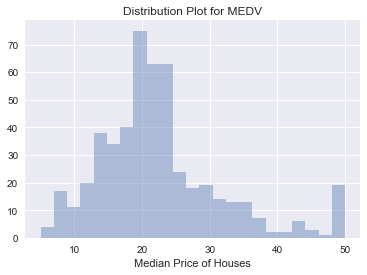

In [17]:
# seaborn.distplot(dfb['MEDV'])
seaborn.distplot(dfb['MEDV'].dropna(), kde=False)
plt.xlabel("Median Price of Houses")
plt.title("Distribution Plot for MEDV")

In [23]:
dfb['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [24]:
dfb['MEDV'].mean()

# other descriptive stats as well

22.53280636250988

In [25]:
dfb['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

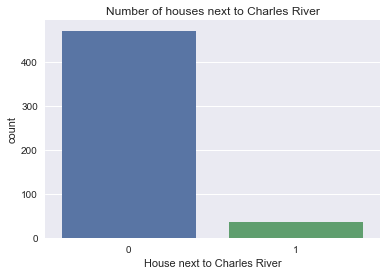

In [26]:
# Is there a problem in the descriptive stats above?
# knowledge of basic stats is essential in figuring out appropriate desc. measures

%matplotlib inline
seaborn.countplot(x='CHAS', data=dfb)
plt.xlabel("House next to Charles River")
plt.title("Number of houses next to Charles River")

In [27]:
# CHAS is a categorical variable
# Next step is to designate appropriate variables as categorical

dfb['CHAS']=dfb['CHAS'].astype('category')
dfb['CHAS']=dfb['CHAS'].cat.rename_categories(["Far", "Close"])

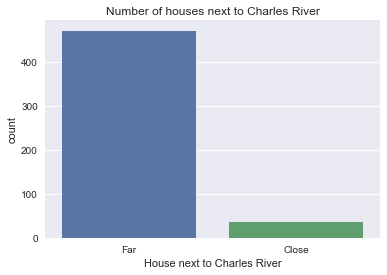

In [28]:
%matplotlib inline
seaborn.countplot(x='CHAS', data=dfb)
plt.xlabel("House next to Charles River")
plt.title("Number of houses next to Charles River")

In [29]:
dfb['CHAS'].describe()

count     506
unique      2
top       Far
freq      471
Name: CHAS, dtype: object

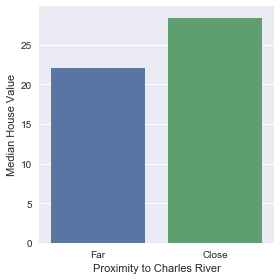

In [32]:
# plot for two variables - one on X and the other on Y

seaborn.factorplot(x='CHAS', y='MEDV', data=dfb, kind='bar', ci=None)  # ci refers to error bars
plt.xlabel("Proximity to Charles River")
plt.ylabel('Median House Value')

In [ ]:
# General Workflow
# Get the data (from csv, web etc)
# Get a sense of the data by 
    # examine few rows (df.head(), for example)
    # data cleaning/manipulation (missing data, data from multiple sources) 
    # figure out the level of the variable (categorical or numeric)
    # Sometimes you may need to assign some variables to be explicitly numeric (for example, RAD above)... 
        # ... while others as categorical (for example, CHAS above)
    # get them done in the beginning before starting data analysis

# pandas is very good for the steps above; pandas, scipy and viz. packages for steps below
# What is/are your target variable? what are your predictors?
# Understand descriptive stats, distributions etc (sometimes using visualizations)
# choose a stats model; run the model; evaluate the model (use scipy package; or even R after exporting the data)


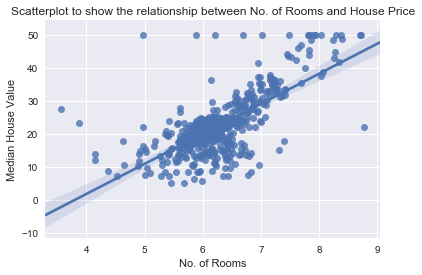

In [33]:
# regplot (2 variables)

seaborn.regplot(x='RM', y='MEDV', data=dfb, fit_reg=True)  
plt.xlabel("No. of Rooms")
plt.ylabel('Median House Value')
plt.title("Scatterplot to show the relationship between No. of Rooms and House Price")

In [26]:
# stats knowledge - look at the value around y=50; implication?

In [34]:
dfb.corr()

,AGE,ZN,INDUS,NOX,RM,CRIM,RAD,MEDV
AGE,1.000000,-0.569537,0.644779,0.731470,-0.240265,0.352734,0.456022,-0.376955
ZN,-0.569537,1.000000,-0.533828,-0.516604,0.311991,-0.200469,-0.311948,0.360445
INDUS,0.644779,-0.533828,1.000000,0.763651,-0.391676,0.406583,0.595129,-0.483725
NOX,0.731470,-0.516604,0.763651,1.000000,-0.302188,0.420972,0.611441,-0.427321
RM,-0.240265,0.311991,-0.391676,-0.302188,1.000000,-0.219247,-0.209847,0.695360
CRIM,0.352734,-0.200469,0.406583,0.420972,-0.219247,1.000000,0.625505,-0.388305
RAD,0.456022,-0.311948,0.595129,0.611441,-0.209847,0.625505,1.000000,-0.381626
MEDV,-0.376955,0.360445,-0.483725,-0.427321,0.695360,-0.388305,-0.381626,1.000000


In [35]:
# stats component from scipy is now a separate package
# scipy is a broader package for doing a range of computations
# people typically use python for data manipulation
# use R/stats packages for data analysis; however, python for programming chops

import statsmodels.api as sm

In [36]:
result=sm.OLS(dfb['MEDV'], dfb['RM']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sun, 26 Nov 2017   Prob (F-statistic):          3.74e-256
Time:                        21:44:39   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# other datasets
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
# http://statweb.stanford.edu/~sabatti/data.html
